
# Fractional Distillation
## Chem 113, Spring 2020, Liang Shi

In this notebook, we will make a temperature-composition diagram of a 1-propanol/2-propanol solution, which is essentially an ideal solution. This diagram will be used to illustrate the process of fractional distillation. 

The vapor pressures (in torr) of 1-propanol and 2-propanol as a function of the Celsius temperature, $t$, are given by the empirical formulas

$$ \ln P_1^* = 18.0699 - \frac{3452.06}{t+204.64} $$

and 

$$ \ln P_2^* = 18.6919 - \frac{3640.25}{t+219.61} $$

In [1]:
# load some libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's first figure out the boiling points of pure 1-propanol and 2-propanol at 1 atm (=760 torr).  At the boing point, $P^* = P_{ext}= 1\;atm = 760\; torr$, so we just need to solve for the temperature that gives $P^*=760\;torr$. 

In [2]:
# for 1-propanol
bp1 = 3452.06/(18.0699-np.log(760.0))-204.64
print("The boiling point of 1-propanol at 1 atm is ", bp1, "degree C")
# for 2-propanol
bp2 = 3640.25/(18.6919-np.log(760.0))-219.61
print("The boiling point of 2-propanol at 1 atm is ", bp2, 'degree C')

The boiling point of 1-propanol at 1 atm is  97.2036916539 degree C
The boiling point of 2-propanol at 1 atm is  82.2704475351 degree C


Let's define the two empirical formulas as two functions

In [3]:
# define P1* as a function of t
def P1(t): # t can be an array
    import numpy as np
    return np.exp(18.0699-3452.06/(t+204.64))

# define P2* as a function of t
def P2(t): # t can be an array
    import numpy as np
    return np.exp(18.6919-3640.25/(t+219.61))

We can compute the mole fraction of 1-propanol in solution, $x_1$, based on Raoult's law:

$$ P_{total} = P_1 + P_2 = x_1 P_1^* + x_2 P_2^* = x_1 P_1^* + (1-x_1) P_2^* $$

$$ P_{total} = P_2^* - x_1 (P_2^*-P_1^*) $$

At the boiling point of the solution, $P_{total}=P_{ext}=760\; torr$. We can solve for $x_1$ that corresponds to a given boiling point of the solution at 1 atm:

$$ x_1 = \frac{P_2^* - 760 \; torr}{P_2^* - P_1^*}. $$

Note that $P_1^*$ and $P_2^*$ are functions of $t$, so $x_1$ is also a function of $t$.

In [4]:
def x1(t):
    return (P2(t)-760.0)/(P2(t)-P1(t))

To figure out the mole fraction of 1-propanol in the vapor phase, $y_1$, at the boiling point of the solution, we use Dalton's law of partial pressures,

$$ y_1 = \frac{P_1}{P_{total}} = \frac{x_1 P_1^*}{760\; torr} $$

Note that $y_1$ is also a function of $t$ since $x_1$ and $P_1^*$ are.

In [5]:
def y1(t):
    return x1(t)*P1(t)/760.0

Now we are ready to make the temperature-composition diagram, namely plotting $t$ as a function of $x_1$ and $t$ as a function of $y_1$ in the same figure. Our diagram is idential to Figure 24.5 in M&S.

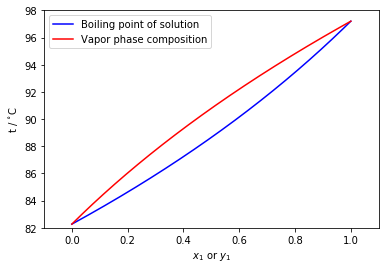

In [6]:
t = np.arange(bp2,bp1,0.001) # sample temperature between the boiling points of pure 1-propanol and 2-propanol.
x1t = x1(t) # get x1(t)
y1t = y1(t) # get y1(t)

plt.plot(x1t,t, 'b-', label="Boiling point of solution") # plot t as a function of x1
plt.plot(y1t,t, 'r-', label="Vapor phase composition")   # plot t as a function of y1
plt.xlabel('$x_1$ or $y_1$')
plt.ylabel('t / $^{\circ}$C')
plt.xlim((-0.1,1.1))
plt.ylim((82.0,98.0))
plt.legend()
plt.show()

Now we are going to use the temperature-composition diagram to simulate the fractional distillation process. Suppose that we have a 1-propanol/2-propanol solution that has a mole fraction of 0.59 in 1-propanol, and we denote this initial mole fraction as $x_{1,i}$ ($x_{1,i}=0.59$). In the fractional distillation process, the solution is boiled and then its vapor is condensed to get a new solution, and this boiling-condensation cycle is repeated for many times until the solution becomes essentially pure in the component with a lower boiling point (in our case, 2-propanol). In our case, $x_1$ becomes increasingly small in the fractional distillation process.

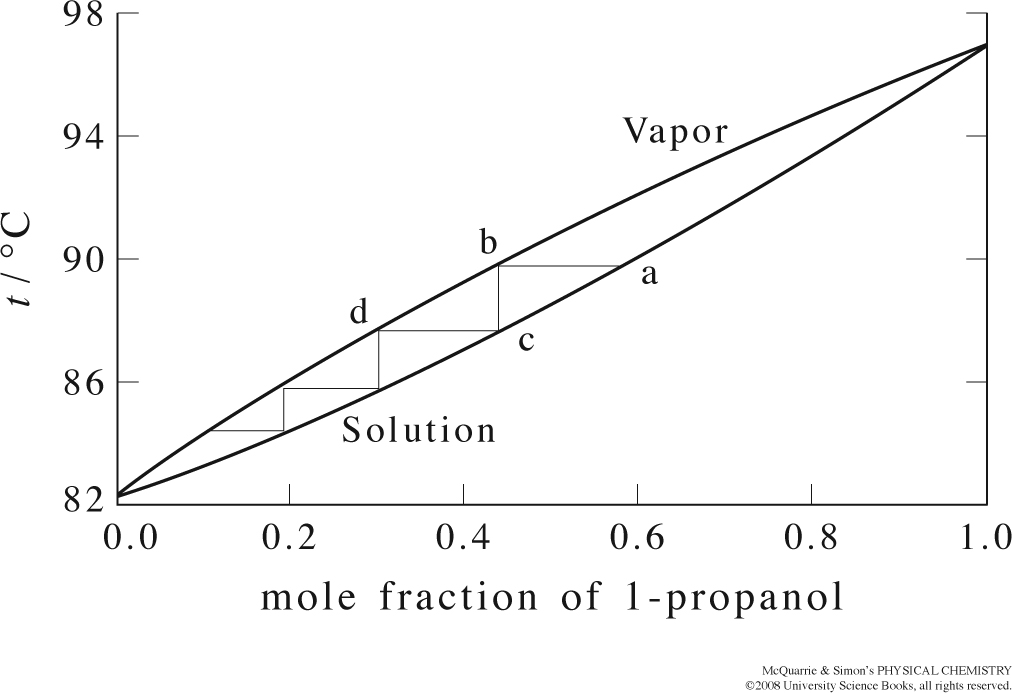

In order to simulate this process, we need to be able to compute the boiling point of the solution for a given $x_1$, and again we use a function for it.

In [7]:
# function bp: given x1, figure out the boiling point bp of the solution
# You don't have to understand the implementation of this function.
def bp(x1t,t,x1i): # x1t, t are arrays, x1i is the given x1
    idx = (np.abs(x1t - x1i)).argmin()
    return(t[idx])

Let's first simulate one boiling-condensation cycle to see how it works.

In [8]:
# One boiling-condensation cycle
# initial x1 is x1i

# initial mole fraction of 1-propanol in the solution
x1i = 0.59

# the boiling point of the solution
bpi = bp(x1t,t,x1i)

# the mole fraction of 1-propanol in the vapor at the boiling point
y1i = y1(bpi) 

# the mole fraction of 1-propanol in the new solution after we condense the vapor
# The initial x1 of the new solution is y1.
x1i = y1i   
print(x1i)

0.446048916197


Since there are many boiling-condensation cycles in a fractional distillation process, we define a new function for one boiling-condenstation cycle.

In [10]:
# x1i is the mole fraction of 1-propanol in the solution before a new cycle starts
def cycle(x1t,t,x1i):  
    # the boiling point of the solution
    bpi = bp(x1t,t,x1i) 
    # the mole fraction of 1-propanol in the vapor at the boiling point, 
    # which becomes the mole fraction of 1-propanol in the new solution after this cycle
    return y1(bpi)       

Let's run 10 cycles to see what we get.

In [11]:
# Suppose we want 10 cycles
ncycles = 10
x1i = 0.59  # initial mole fraction of 1-propanol in the solution before fractional distillation
print("Cycle","\t","x1")
for i in range(ncycles+1):
    print(i,"\t",x1i)
    x1i = cycle(x1t,t,x1i)

Cycle 	 x1
0 	 0.59
1 	 0.446048916197
2 	 0.309756845354
3 	 0.199525847667
4 	 0.121351853147
5 	 0.0709581328722
6 	 0.0404582656816
7 	 0.0227573968863
8 	 0.0126880055348
9 	 0.00704290930993
10 	 0.0038855888807


### Group Exercise

If we want a 2-propanol liquid with a purity of 99.99% from a 1-propanol/2-propanol solution with $x_1=0.59$, how many boiling-condensation cycles do we have to run in the fractional distillation process? What is the answer if $x_1=0.79$?